<a href="https://colab.research.google.com/github/thomasathul/Rice-Plant-Disease-Detection/blob/main/InceptionV3model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import tensorflow_datasets as tfds
import numpy as np
from sklearn.model_selection import train_test_split
import os
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [122]:
IMAGE_SIZE = [224, 224]
data_path='/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled'


In [123]:
images = glob(os.path.join(data_path, '*/*.jpg'))
total_images = len(images)
print('Total images:', total_images)

Total images: 3355


In [124]:
image_count = []
class_names = []

for folder in os.listdir(os.path.join(data_path)):
    folder_num = len(os.listdir(os.path.join(data_path, folder)))
    image_count.append(folder_num)
    class_names.append(folder)
    print('{:20s}'.format(folder), end=' ')
    print(folder_num)

LeafBlast            779
Hispa                565
BrownSpot            523
Healthy              1488


In [125]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [126]:
for layer in inception.layers:
    layer.trainable = False

In [127]:
folders = glob('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled/*')

In [128]:
x = Flatten()(inception.output)

In [129]:
prediction = Dense(len(folders), activation='softmax')(x)

model = Model(inputs=inception.input, outputs=prediction)

In [130]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_470 (Conv2D)             (None, 111, 111, 32) 864         input_6[0][0]                    
__________________________________________________________________________________________________
batch_normalization_470 (BatchN (None, 111, 111, 32) 96          conv2d_470[0][0]                 
__________________________________________________________________________________________________
activation_470 (Activation)     (None, 111, 111, 32) 0           batch_normalization_470[0][0]    
____________________________________________________________________________________________

In [131]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [132]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [133]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/Labelled',
                                  target_size = (224, 224),
                                  batch_size = 32,
                                  class_mode = 'categorical')

Found 3355 images belonging to 4 classes.


In [134]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1600 images belonging to 4 classes.


In [139]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
105/105 [==============================] - 1430s 14s/step - loss: 3.1577 - accuracy: 0.5538 - val_loss: 2.4139 - val_accuracy: 0.5888
Epoch 2/10
105/105 [==============================] - 1005s 10s/step - loss: 3.4293 - accuracy: 0.5785 - val_loss: 3.0013 - val_accuracy: 0.5931
Epoch 3/10
105/105 [==============================] - 1012s 10s/step - loss: 3.2903 - accuracy: 0.6101 - val_loss: 2.6302 - val_accuracy: 0.6363
Epoch 4/10
105/105 [==============================] - 993s 9s/step - loss: 3.0804 - accuracy: 0.6128 - val_loss: 3.2900 - val_accuracy: 0.6112
Epoch 5/10
105/105 [==============================] - 1013s 10s/step - loss: 2.8798 - accuracy: 0.6331 - val_loss: 3.2152 - val_accuracy: 0.6344
Epoch 6/10
105/105 [==============================] - 1007s 10s/step - loss: 2.7533 - accuracy: 0.6525 - val_loss: 3.0692 - val_accuracy: 0.6519
Epoch 7/10
105/105 [==============================] - 1005s 10s/step - loss: 2.7494 - accuracy: 0.6659 - val_loss: 1.7719 - val_accu

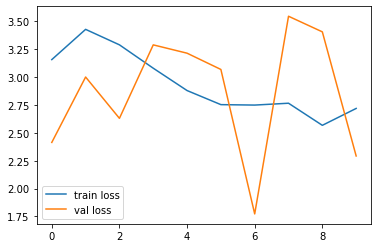

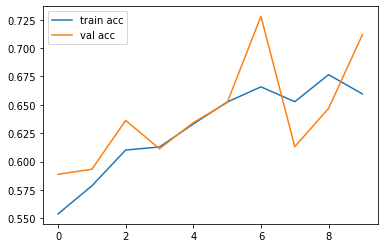

<Figure size 432x288 with 0 Axes>

In [140]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [141]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model.save('ricemodel_inception.h5')

In [142]:
y_pred = model.predict(test_set)

In [143]:
y_pred

array([[1.47596103e-04, 1.99783733e-03, 5.81345595e-02, 9.39720035e-01],
       [1.15263321e-09, 1.00000000e+00, 1.88405319e-10, 1.38919449e-11],
       [2.99938411e-01, 7.00053751e-01, 1.03571326e-13, 7.88058514e-06],
       ...,
       [2.33955979e-02, 2.50633220e-05, 4.26565930e-05, 9.76536632e-01],
       [4.60025694e-14, 3.37033851e-12, 5.15773058e-20, 1.00000000e+00],
       [6.09527651e-10, 5.73736907e-04, 2.10711337e-03, 9.97319162e-01]],
      dtype=float32)

In [144]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [145]:
y_pred

array([3, 1, 1, ..., 3, 3, 3])

In [176]:
img=image.load_img('/content/drive/MyDrive/kaggle/rice/RiceDiseaseDataset/validation/Healthy/IMG_20190419_103002.jpg',target_size=(224,224))

In [177]:
x=image.img_to_array(img)
x

array([[[222., 227., 255.],
        [229., 236., 255.],
        [206., 213., 255.],
        ...,
        [207., 214., 255.],
        [200., 205., 247.],
        [206., 213., 255.]],

       [[229., 236., 255.],
        [225., 231., 255.],
        [217., 223., 255.],
        ...,
        [207., 216., 255.],
        [216., 222., 255.],
        [204., 209., 251.]],

       [[223., 228., 255.],
        [221., 226., 255.],
        [221., 226., 255.],
        ...,
        [206., 213., 255.],
        [209., 214., 255.],
        [212., 217., 255.]],

       ...,

       [[225., 231., 255.],
        [229., 236., 255.],
        [217., 223., 255.],
        ...,
        [202., 209., 255.],
        [206., 211., 253.],
        [214., 220., 254.]],

       [[217., 223., 255.],
        [228., 235., 254.],
        [228., 234., 255.],
        ...,
        [216., 222., 255.],
        [206., 211., 253.],
        [206., 211., 253.]],

       [[222., 227., 255.],
        [220., 225., 255.],
        [228., 2

In [178]:
x.shape

(224, 224, 3)

In [179]:
x=x/255

In [180]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [181]:
model.predict(img_data)

array([[1.5413862e-01, 1.4427742e-01, 1.1702217e-04, 7.0146686e-01]],
      dtype=float32)

In [192]:
a=np.argmax(model.predict(img_data), axis=1)
print('Detected: {}'.format(class_names[3]))

Detected: Healthy


In [186]:
a==2

array([False])